In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [61]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [62]:
#Visualización de los datos
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
#Preparación de los datos que utilizaremos para predecir el precio de la casa
X=train[["GrLivArea","LotArea","LotFrontage","MoSold"]]
y=train["SalePrice"]

In [64]:
#Verificación de datos nulos
X.isnull().sum()


GrLivArea        0
LotArea          0
LotFrontage    259
MoSold           0
dtype: int64

In [65]:
#Rellenar los valores nulos con 0
X=X.fillna(X.mean())
X.isnull().sum()

GrLivArea      0
LotArea        0
LotFrontage    0
MoSold         0
dtype: int64

In [66]:
#Separación de los datos en prueba y entrenamiento
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
#Creación del modelo
md=LinearRegression()
md.fit(X_train,y_train)

LinearRegression()

In [68]:
#Evaluación del modelo
y_pred=md.predict(X_test)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [69]:
print("\nMetricas de evaluación:")
print(f"Coeficiente de determinación (R2): {r2:.2f}")
print(f"Raíz del error cuadratico medio (RMSE): {rmse:.2f}")


Metricas de evaluación:
Coeficiente de determinación (R2): 0.57
Raíz del error cuadratico medio (RMSE): 57759.84


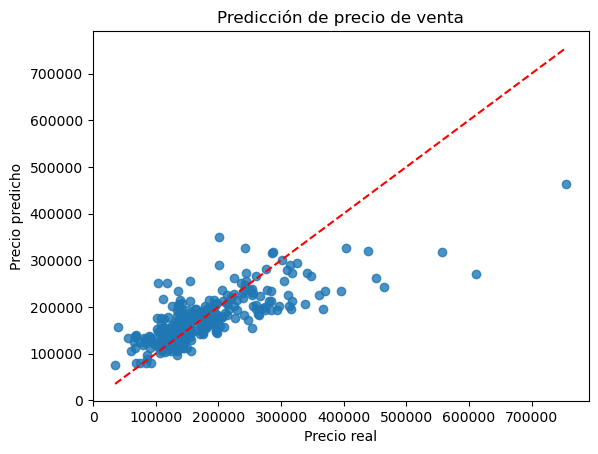

In [72]:
#Visualización Grafica
plt.title("Predicción de precio de venta")
plt.scatter(y_test,y_pred,alpha=.8)
plt.plot([y.min(),y.max()],[y.min(),y.max()],"r--")
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.show()

In [71]:
#Predicción
nuevos_datos=pd.DataFrame({
    "GrLivArea":[1329],
    "LotArea": [9600],
    "LotFrontage":[80],
    "MoSold":[5]
})
precio_predicho=md.predict(nuevos_datos)
print(f"El precio de venta predicho para los nuevos datos es: ${precio_predicho[0]:.2f}")

El precio de venta predicho para los nuevos datos es: $163663.43
